## Data Analysis
## NBA Teams with the most ACL injuries?  2010-2011 through 2019-2020 seasons

Steps for this project
- load in the csv
- data clean for ACL related injuries only
- count the number of times an NBA team is mentioned on the injury report
- take the count and create a pie chart

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
inj_ds=pd.read_csv(r"/Users/ryantseng/Documents/injuries_2010-2020.csv")

#print(inj_ds)

In [63]:
#Look for data that has to do with ACL injuries
inj_ds=inj_ds[inj_ds['Notes'].str.contains('ACL')]


In [64]:
#remove unnecessary columns
inj_ds=inj_ds.drop(['Date','Acquired','Notes'],axis=1)


In [65]:
#take the rows where relinquished is not NaN
inj_ds=inj_ds[inj_ds['Relinquished'].notna()]


In [66]:
#remove duplicates of the same injury being reported
inj_ds=inj_ds.drop_duplicates(subset=['Relinquished'],keep='last')


In [67]:
#array creation
tname= ["Blazers", "Celtics", "Bucks", "Suns", "Hornets", "Thunder", "Knicks", "Timberwolves", "Hawks", "Wizards", 
        "Jazz", "Nuggets","76ers", "Nets", "Cavaliers", "Raptors", "Bulls", "Spurs", "Warriors", "Lakers", "Pacers", "Magic"]
team=[]



In [68]:
#counter for each team

for i in range(len(tname)):
    
    x=inj_ds['Team'].str.count(tname[i]).sum()
    team.append(x)



#counter in python, group by, valuecounts

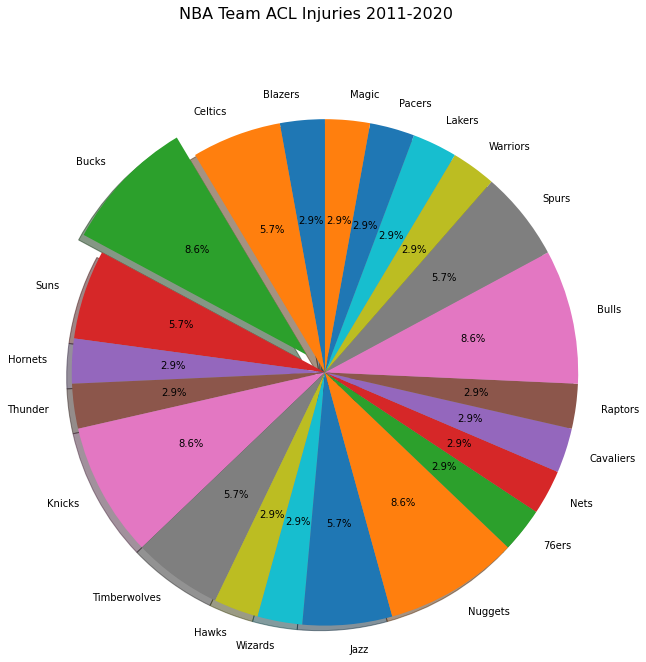

In [69]:
#building pie chart
labels = tname
sizes = team

#for loop for picking a team to explode
expname = 'Bucks'
explode =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for j in range(len(tname)):
    
    if tname[j]==expname: 
        explode[j]=0.1
        
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.suptitle('NBA Team ACL Injuries 2011-2020',size=16,y=1.01)

fig = plt.gcf()
fig.set_size_inches(10,10) 



plt.show()

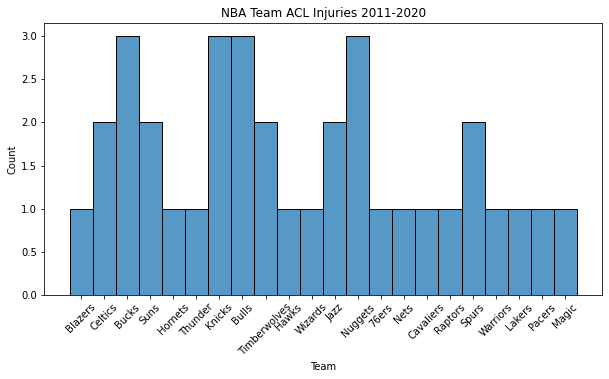

In [70]:
#seaborn histogram
#print(inj_ds)

fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=inj_ds, x='Team').set_title('NBA Team ACL Injuries 2011-2020')
plt.xticks(rotation=45)
plt.show()